Introduction to Online Shopping Intention Analysis
In recent years, e-commerce has brought huge benefits to suppliers and consumers. Defined as the use of the Internet to sell products or services to individual consumers, e-commerce has profoundly changed the way people conduct their business.

Indeed, it has become an important full-fledged transaction channel. A recent survey of online shopping predicted that the total amount of direct sales to customers will exceed $ 240 billion by 2007. Major technological innovations in online shopping have changed transaction channels in the information age.

With the growth of online shopping, it has become important to understand the factors that influence a consumer’s intention to buy from a website rather than just browse. This emerging topic is of interest to both academics and machine learning practitioners.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [6]:
#import dataset
df=pd.read_csv("online_shoppers_intention.csv")

In [7]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [9]:
missing=df.isnull().sum()
missing

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [13]:
#Now have a look at product related bounce rates of customers:
x=df.iloc[:,[5,6]].values
x.shape

(12330, 2)

In [14]:
#Now let’s apply the K-elbow method to determine the number of clustering groups
from sklearn.cluster import KMeans

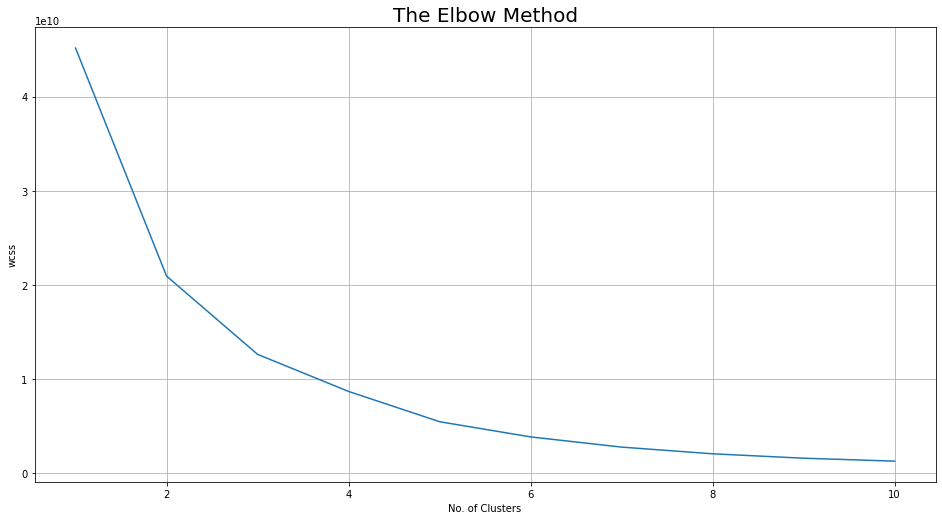

In [16]:
wcss=[]
for i in range(1,11):
    km= KMeans(n_clusters = i,
              init= 'k-means++',
              max_iter=300,
              n_init=10,
              random_state=0,
              tol=0.001)
    km.fit(x)
    labels=km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams["figure.figsize"]=(13,7)
plt.plot(range(1,11),wcss)
plt.grid()
plt.tight_layout()
plt.title("The Elbow Method",fontsize=20)
plt.xlabel("No. of Clusters")
plt.ylabel("wcss")
plt.show()

In [19]:
#K Means Clustering
#According to the graph above, the maximum curvature is at the second index, that is, the number of optimal clustering groups 
#for the duration of the product and the bounce rates is 2. Once the number of clusterings determined, we apply the K Means 
#method and plot the clusters:

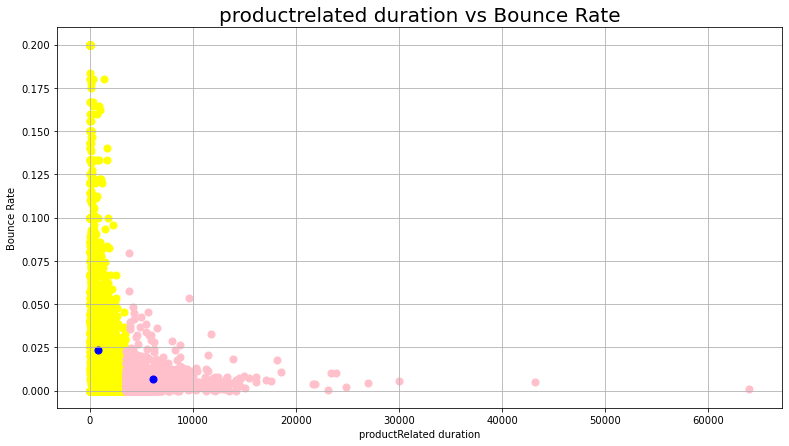

In [21]:
km=KMeans(n_clusters = 2,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_means=km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='yellow',label="uninterested customers")
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label="Target customers")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c="blue",label="cnetroid")

plt.title("productrelated duration vs Bounce Rate",fontsize=20)
plt.grid()
plt.xlabel("productRelated duration")
plt.ylabel("Bounce Rate")
plt.show()

Looking at this K Means grouping plot, we can say with certainty that customers who spent more time on a product-related website are very less likely to leave the website after viewing a single page.

Since K-Means is not a supervised learning method, we are adopting other ways of evaluating its clustering result. The leftmost column of the confusion matrix represents the actual label (True or False revenue), and the top row represents the expected clustering groups (uninterested customers or target customers):

In [35]:
!pip install scikit-plot

Adjusted rand index:
0.08359442469281096


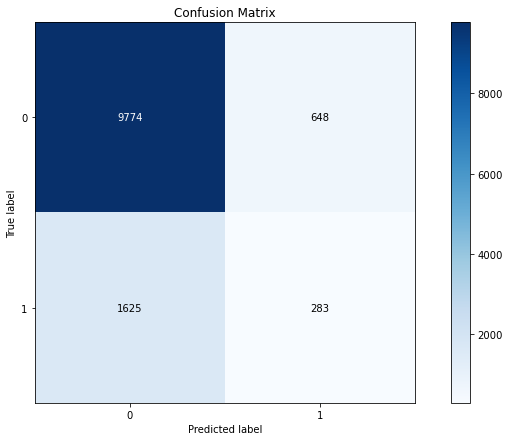

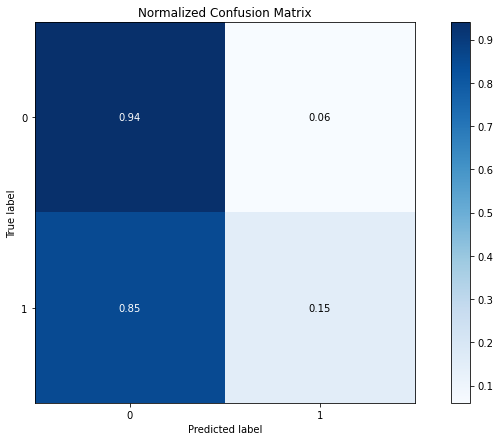

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
labels_true=le.fit_transform(df["Revenue"])

# get predicted clustering result label
labels_pred=y_means

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score= metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index:")
print(score)

import scikitplot as skplt
plt_1= skplt.metrics.plot_confusion_matrix(labels_true,labels_pred,normalize=False)
plt_2=skplt.metrics.plot_confusion_matrix(labels_true,labels_pred,normalize=True)


Observations From Above Plots:
From the confusion matrix, we can see that out of 10,422 failed incomes, 9,769 are grouped into uninterested customers or 94%. However, out of 937 successful incomes, only 284 are grouped as target customers or 15%. Also, the adjusted index score is not very high.
So it is clear that we have poorly bundled many successful revenue sessions as uninterested customers, which means when the high bounce rate combined with a short product-related page duration, there are still a lot of customers. targets.